In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Train model

In [2]:
# def createdf(file, um):
#     df = pd.read_csv(file, header=None)
#     df.rename(columns={0: "action", 1: "interaction", 2:"prev_success", 3: "prev_action"}, inplace=True)
#     df['um']=um
#     return df

# df_um1= createdf('interactions_um1.csv', 1)
# df_um2= createdf('interactions_um2.csv', 2)
# df_um3= createdf('interactions_um3.csv', 3)
# df_um4= createdf('interactions_um4.csv', 4)
# frames = [df_um1, df_um2, df_um3, df_um4]
# # 
# df_ums = pd.concat(frames)
# # df_ums.drop(["1"], axis=1, inplace=True)
# # df_ums.dropna(inplace=True)
# df_ums.head()

In [3]:
# df_ums.groupby(["um", "action", "prev_success"]).mean()

In [4]:

# # X = df_ums.iloc[:,:-1]
# y = df_ums.iloc[:, -1:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# print(X_train.isnull())


In [6]:
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)


In [7]:
# knn.score(X_test, y_test)

# Episodic data


In [8]:
import ast  # Import the ast module to convert strings to lists

# Function to concatenate values in each row without square brackets
def concatenate_values(row):
    return ','.join(map(str, sum(map(ast.literal_eval, row), [])))




In [9]:
def createdf(file, um):
    df = pd.read_csv(file, header=None)
    df['combined'] = df.apply(concatenate_values, axis=1)
    df = df.drop(columns=df.columns.difference(['combined'])) 
    # Split the values in the 'combined' column
    split_values = df['combined'].str.split(',', expand=True)

    # Concatenate the split values with the original DataFrame
    df = pd.concat([df, split_values], axis=1)
    df = df.drop(["combined"], axis=1) 

    df['um']=um
    return df

dfe_um1= createdf('interactions_um1_episodes.csv', 1)
dfe_um2= createdf('interactions_um2_episodes.csv', 2)
dfe_um3= createdf('interactions_um3_episodes.csv', 3)
dfe_um4= createdf('interactions_um4_episodes.csv', 4)
frames = [dfe_um1, dfe_um2, dfe_um3, dfe_um4]

dfe_ums = pd.concat(frames)
# dfe_ums.drop(["1"], axis=1, inplace=True)
# dfe_ums.dropna(inplace=True)
dfe_ums.head()

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,um
0,0,0,0,0,0,0,0,0,1,0,...,5,5,0,0,5,4,1,0,5,1
1,0,0,0,0,0,0,0,0,1,0,...,5,5,0,0,5,4,1,0,5,1
2,0,0,0,0,0,0,0,0,1,0,...,5,5,0,0,5,4,1,0,5,1
3,0,0,0,0,0,0,0,0,1,0,...,5,5,0,0,5,4,1,0,5,1
4,0,0,0,0,0,0,0,0,1,1,...,5,5,0,0,5,4,1,0,5,1


In [10]:
Xe = dfe_ums.iloc[:,:-1]
ye = dfe_ums.iloc[:, -1:]
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye, test_size=0.2, random_state=42)

In [11]:
Xe_test.head()

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
555,0,0,0,0,0,0,0,0,1,1,...,0,5,5,0,0,5,4,0,0,5
491,0,0,0,0,0,0,0,0,1,0,...,0,5,5,0,0,5,4,0,0,5
527,0,0,0,0,0,0,0,0,1,0,...,0,5,5,0,0,5,4,1,0,5
925,0,0,0,0,0,0,0,0,1,0,...,1,5,5,0,0,5,4,1,0,5
989,0,0,0,0,0,0,0,0,1,0,...,0,5,5,0,0,5,4,0,0,5


## KNN

In [12]:
knn_e = KNeighborsClassifier(n_neighbors=5)
knn_e.fit(Xe_train, ye_train)

C:\ProgramData\Anaconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [13]:
knn_e.score(Xe_test.values, ye_test)

0.8625

In [14]:
y_pred = knn_e.predict(Xe_test.values)

In [15]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(ye_test, y_pred))

[[155   0  31  23]
 [  9 203   0   1]
 [  0   0 153  41]
 [  0   0   5 179]]


#### Test on user model 5

In [31]:
dfe_um5= createdf('interactions_um5_episodes.csv', 5)
dfe_um5.drop(["um"], axis =1, inplace=True)
dfe_um5.head()

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,0,0,0,0,0,0,0,0,1,0,...,0,5,5,0,0,5,4,1,0,5


In [32]:
pred = knn_e.predict(dfe_um5.values)
print(pred[0])

3


In [34]:
print(knn_e.predict_proba(dfe_um5.values))

[[0.4 0.  0.6 0. ]]


In [33]:
dfe_um5_1= createdf('interactions_um5_episodes_1.csv', 5)
dfe_um5_1.drop(["um"], axis =1, inplace=True)
pred = knn_e.predict(dfe_um5_1.values)
print(pred[0])

3


# RF

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [37]:
rf = RandomForestClassifier()
rf.fit(Xe_train, ye_train)

C:\ProgramData\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [39]:
y_pred = rf.predict(Xe_test)

In [42]:
accuracy = accuracy_score(ye_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96375


In [43]:
print (confusion_matrix(ye_test, y_pred))

[[199   1   8   1]
 [  1 212   0   0]
 [  4   0 183   7]
 [  0   0   7 177]]


In [48]:
print(rf.predict(dfe_um5.values)[0])

1


In [46]:
print(rf.predict_proba(dfe_um5.values))

[[0.36 0.31 0.31 0.02]]


In [53]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(Xe_train, ye_train)

C:\ProgramData\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001988F2230D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001988F1B6BF0>})

In [54]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 380}


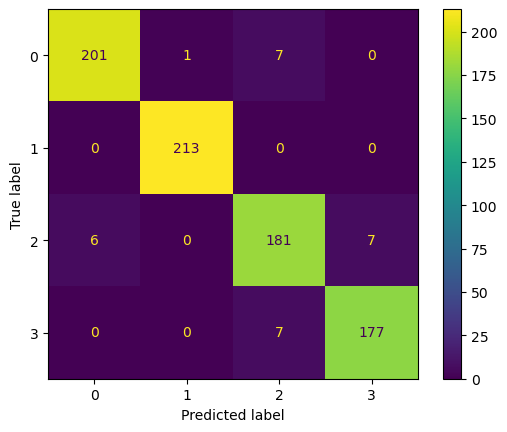

In [55]:
# Generate predictions with the best model
y_pred = best_rf.predict(Xe_test)

# Create the confusion matrix
cm = confusion_matrix(ye_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [61]:
y_pred = best_rf.predict(Xe_test)

accuracy = accuracy_score(ye_test, y_pred)
# precision = precision_score(ye_test, y_pred)
# recall = recall_score(ye_test, y_pred)

print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)

Accuracy: 0.965


### Try on user model 5

In [62]:
print(best_rf.predict(dfe_um5.values)[0])

1


In [63]:
print(best_rf.predict_proba(dfe_um5.values))

[[0.37197227 0.29527621 0.3003625  0.03238902]]


## SVM

In [80]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', probability= True) # Linear Kernel

#Train the model using the training sets
clf.fit(Xe_train, ye_train)

#Predict the response for test dataset
y_pred = clf.predict(Xe_test)


C:\ProgramData\Anaconda3\envs\py\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ye_test, y_pred))


Accuracy: 0.965


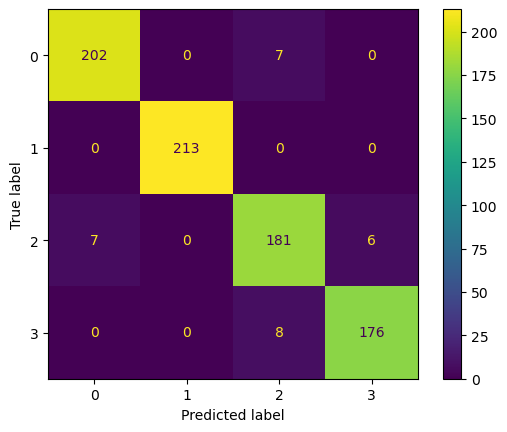

In [82]:
cm = confusion_matrix(ye_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Try on user model 5

In [83]:
print(clf.predict(dfe_um5.values)[0])
print(clf.predict_proba(dfe_um5.values))

1
[[9.51660723e-01 2.95985970e-02 1.81294468e-02 6.11233044e-04]]


# Distance measure

In [22]:
median_df= dfe_ums.groupby(['um']).median()
median_df

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
um,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,5.0,0.0,0.0,5.0,4.0,1.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,5.0,5.0,0.0,0.0,5.0,4.0,1.0,0.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,5.0,0.0,0.0,5.0,4.0,0.0,0.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,5.0,0.0,0.0,5.0,4.0,0.0,0.0,5.0


In [23]:
from scipy.spatial.distance import euclidean
import numpy as np
um5= np.array(dfe_um5.iloc[0,:-1]).astype(str).astype(int)
um1= np.array(median_df.iloc[0,:-1]).astype(int)
um2= np.array(median_df.iloc[1,:-1]).astype(int)
um3= np.array(median_df.iloc[2,:-1]).astype(int)
um4= np.array(median_df.iloc[3,:-1]).astype(int)



In [24]:
d_to_um1 = euclidean(um5, um1)
d_to_um2 = euclidean(um5, um2)
d_to_um3 = euclidean(um5, um3)
d_to_um4 = euclidean(um5, um4)
print("Distance to um1: %2d; distance to um2: %2d; distance to um3: %2d; distance to um4:%2d" %(d_to_um1, d_to_um2,d_to_um3, d_to_um4))

Distance to um1: 10; distance to um2: 14; distance to um3:  9; distance to um4:10


In [25]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise([um1, um2, um3, um4, um5])

array([[ 0.        , 13.19090596, 11.        ,  7.54983444, 10.34408043],
       [13.19090596,  0.        , 15.45962483, 13.22875656, 14.31782106],
       [11.        , 15.45962483,  0.        ,  8.        ,  9.05538514],
       [ 7.54983444, 13.22875656,  8.        ,  0.        , 10.48808848],
       [10.34408043, 14.31782106,  9.05538514, 10.48808848,  0.        ]])

In [26]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise([um1, um2, um3, um4, um5])

array([[  0., 174., 121.,  57., 107.],
       [174.,   0., 239., 175., 205.],
       [121., 239.,   0.,  64.,  82.],
       [ 57., 175.,  64.,   0., 110.],
       [107., 205.,  82., 110.,   0.]])

In [27]:
# m1= df_um1.groupby(["action", "prev_success"])['interaction'].mean().to_numpy()
# m2= df_um2.groupby(["action", "prev_success"])['interaction'].mean().to_numpy()
# m3= df_um3.groupby(["action", "prev_success"])['interaction'].mean().to_numpy()
# m4= df_um4.groupby(["action", "prev_success"])['interaction'].mean().to_numpy()


NameError: name 'df_um1' is not defined

In [28]:
# m5= df_um5.groupby(["action", "prev_success"])['interaction'].mean().to_numpy()


NameError: name 'df_um5' is not defined

In [ ]:
# dist = DistanceMetric.get_metric('euclidean')
# dist.pairwise([m1, m2, m3, m4, m5])